### Lower Bound

$$minimize \frac{1}{2}\sum_{i!=j}(1+y_{ij})$$

In [1]:
import cvxpy as cp
import numpy as np

# Define the problem data
n = 10 # number of variables
y = cp.Variable((n,n), symmetric=True) # variable
constraints = [y[i,i] == 1 for i in range(n)] # equality constraints
for i in range(n):
    for j in range(i):
        constraints += [-1 <= y[i,j], y[i,j] <= 1] # inequality constraints
constraints += [y >> 0] # semidefinite constraint
#f = cp.sum(cp.inv_pos(1-y[np.triu_indices(n,1)])) # objective function
f = cp.sum(1+y[np.triu_indices(n,1)]) # objective function

# Define the optimization problem
problem = cp.Problem(cp.Minimize(f), constraints)

# Solve the problem
problem.solve(cp.SCS, verbose=True)
print("Optimal value: ", problem.value)
print("Optimal y: ", y.value)


                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Apr 09 05:32:55 PM: Your problem has 100 variables, 101 constraints, and 0 parameters.
(CVXPY) Apr 09 05:32:55 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 09 05:32:55 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 09 05:32:55 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 09 05:32:55 PM: Compiling problem (target solver=SCS).
(CVXPY) Apr 09 05:32:55 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

In [2]:
print("Optimal value: ", problem.value)
print("Optimal y: ", y.value)

Optimal value:  40.00000000016815
Optimal y:  [[ 1.         -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.         -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111  1.         -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111  1.         -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111  1.         -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111  1.
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
   1.         -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111

### Upper Bound

$$minimize (\frac{1}{4}+\frac{1}{4\epsilon})n(n-1)+\frac{1}{2\epsilon}\sum_{i!=j}y_{ij}$$


In [3]:
import cvxpy as cp
import numpy as np

def upper_bound(eps, n=10):
    y = cp.Variable((n,n), symmetric=True) # variable
    constraints = [y[i,i] == 1 for i in range(n)] # equality constraints
    for i in range(n):
        for j in range(i):
            constraints += [-1 <= y[i,j], y[i,j] <= 1] # inequality constraints
    constraints += [y >> 0] # semidefinite constraint
    #f = cp.sum(cp.inv_pos(1-y[np.triu_indices(n,1)])) # objective function
    f = (1/4+1/(4*eps))*(n*(n-1))+1/(2*eps)*cp.sum(y[np.triu_indices(n,1)]) # objective function

    # Define the optimization problem
    problem = cp.Problem(cp.Minimize(f), constraints)

    # Solve the problem
    problem.solve(cp.SCS, verbose=True)
    # print("Optimal value: ", problem.value)
    # print("Optimal y: ", y.value)
    return problem.value, y.value

In [4]:
n = 10 # number of variables
eps = 0.1
eps = [i/100 for i in range(100, 0, -1)]
print(eps)
bound_value = []

for e in eps:
    val, _ = upper_bound(e, 10)
    bound_value.append(val)
    print("epsilon: ", e, "Optimal value: ", val)


[1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3, 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Apr 09 05:33:02 PM: Your problem has 100 variables, 101 constraints, and 0 parameters.
(CVXPY) Apr 09 05:33:02 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 09 05:33:02 PM: (If you need to solve this problem multiple

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[42.50000071256118, 42.702021196241745, 42.90816435134987, 43.11855768871463, 43.33333406423544, 43.55263199530732, 43.7765958514039, 44.005376196306166, 44.239130119674776, 44.4780215940283, 44.72222185953215, 44.9719098379041, 45.22727257636309, 45.48850572243807, 45.75581403062079, 46.02941190234631, 46.30952396151613, 46.59638566868171, 46.89024397792649, 47.19135804581569, 47.49999998491097, 47.81645565238303, 48.141025578764626, 48.474025905290205, 48.8157894104649, 49.16666661905192, 49.52702700143214, 49.89726027200334, 50.27777779610443, 50.66901411585875, 51.07142860651487, 51.485507276256065, 51.91176472413649, 52.35074627277361, 52.80303029462763, 53.269230753101, 53.74999998233069, 54.24603173238433, 54.758064509658396, 55.286885245975455, 55.83333333785228, 56.398305091262344, 56.98275862701921, 57.58771930282719, 58.21428571634898, 58.863636363213686, 59.537037034822305, 60.23584905374667, 60.96153845964071, 61.715686273865664, 62.50000000016815, 63.316326530974656, 64.1

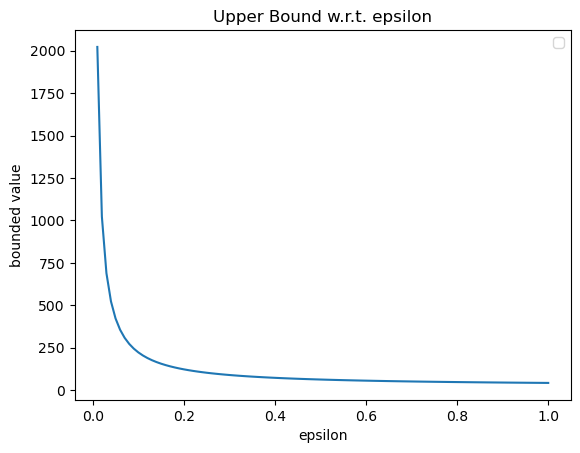

In [27]:
import matplotlib.pyplot as plt

plt.plot(eps, bound_value)
plt.title(f'Upper Bound w.r.t. epsilon')
plt.xlabel('epsilon')
plt.ylabel('bounded value')
plt.legend()

print(bound_value)

### Equivalent Eigenvalue Bound Problem



In [26]:
import cvxpy as cp
import numpy as np

# Define the problem data
n = 10 # number of variables
y = cp.Variable((n,n), symmetric=True) # variable
W = np.ones((n,n))-np.diag(np.ones(n))
#print(cp.diag(W*y))
constraints = [(W + cp.diag(cp.diag(W*y))) >> 0]
# print(W)
#constraints = [y[i,i] == 1 for i in range(n)] # equality constraints
# for i in range(n):
#     # for j in range(i):
#     #     constraints += [-1 <= y[i,j], y[i,j] <= 1] # inequality constraints
# #constraints += [y >> 0] # semidefinite constraint
# constraints = W + 
# #f = cp.sum(cp.inv_pos(1-y[np.triu_indices(n,1)])) # objective function
f = 1/2*(n*(n-1)) - 1/4 * cp.sum(cp.diag(W*y)) # objective function

# # Define the optimization problem
problem = cp.Problem(cp.Maximize(f), constraints)

# # Solve the problem
problem.solve(cp.SCS, verbose=True)
print("Optimal value: ", problem.value)
print("Optimal y: ", y.value)


                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Apr 09 06:09:09 PM: Your problem has 100 variables, 1 constraints, and 0 parameters.
(CVXPY) Apr 09 06:09:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 09 06:09:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 09 06:09:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 09 06:09:09 PM: Compiling problem (target solver=SCS).
(CVXPY) Apr 09 06:09:09 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Cone

/Users/zhaorunchen/opt/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 25 times so far.

  warnings.warn(msg, UserWarning)
/Users/zhaorunchen/opt/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 26 times so far.

  warnings.warn(

42.500003970745844

In [28]:
print("Optimal value: ", problem.value)
print("Optimal y: ", y.value)

Optimal value:  42.500003970745844
Optimal y:  [[0.         0.11111093 0.11111093 0.11111093 0.11111093 0.11111093
  0.11111093 0.11111093 0.11111093 0.11111093]
 [0.11111093 0.         0.11111093 0.11111093 0.11111093 0.11111093
  0.11111093 0.11111093 0.11111093 0.11111093]
 [0.11111093 0.11111093 0.         0.11111093 0.11111093 0.11111093
  0.11111093 0.11111093 0.11111093 0.11111093]
 [0.11111093 0.11111093 0.11111093 0.         0.11111093 0.11111093
  0.11111093 0.11111093 0.11111093 0.11111093]
 [0.11111093 0.11111093 0.11111093 0.11111093 0.         0.11111093
  0.11111093 0.11111093 0.11111093 0.11111093]
 [0.11111093 0.11111093 0.11111093 0.11111093 0.11111093 0.
  0.11111093 0.11111093 0.11111093 0.11111093]
 [0.11111093 0.11111093 0.11111093 0.11111093 0.11111093 0.11111093
  0.         0.11111093 0.11111093 0.11111093]
 [0.11111093 0.11111093 0.11111093 0.11111093 0.11111093 0.11111093
  0.11111093 0.         0.11111093 0.11111093]
 [0.11111093 0.11111093 0.11111093 0.1111